<a href="https://colab.research.google.com/github/TADangChauKhue/Machine-Learning_Model-for-predicting-churned-users/blob/main/K19_TADangChauKhue_ML_Churn_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
import time
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving churn_prediction.xlsx to churn_prediction.xlsx


In [ ]:
data = pd.read_excel("churn_prediction.xlsx")
print(data)

      CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  \
0          50001      1     4.0         Mobile Phone         3   
1          50002      1     NaN                Phone         1   
2          50003      1     NaN                Phone         1   
3          50004      1     0.0                Phone         3   
4          50005      1     0.0                Phone         1   
...          ...    ...     ...                  ...       ...   
5625       55626      0    10.0             Computer         1   
5626       55627      0    13.0         Mobile Phone         1   
5627       55628      0     1.0         Mobile Phone         1   
5628       55629      0    23.0             Computer         3   
5629       55630      0     8.0         Mobile Phone         1   

      WarehouseToHome PreferredPaymentMode  Gender  HourSpendOnApp  \
0                 6.0           Debit Card  Female             3.0   
1                 8.0                  UPI    Male             3.0 

In [ ]:
# Check imbalanced data
check=data['Churn'].sum()/data['CustomerID'].count()

check

0.16838365896980462

 **Handle missing value & duplicate value**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [ ]:
data.duplicated().any()

False

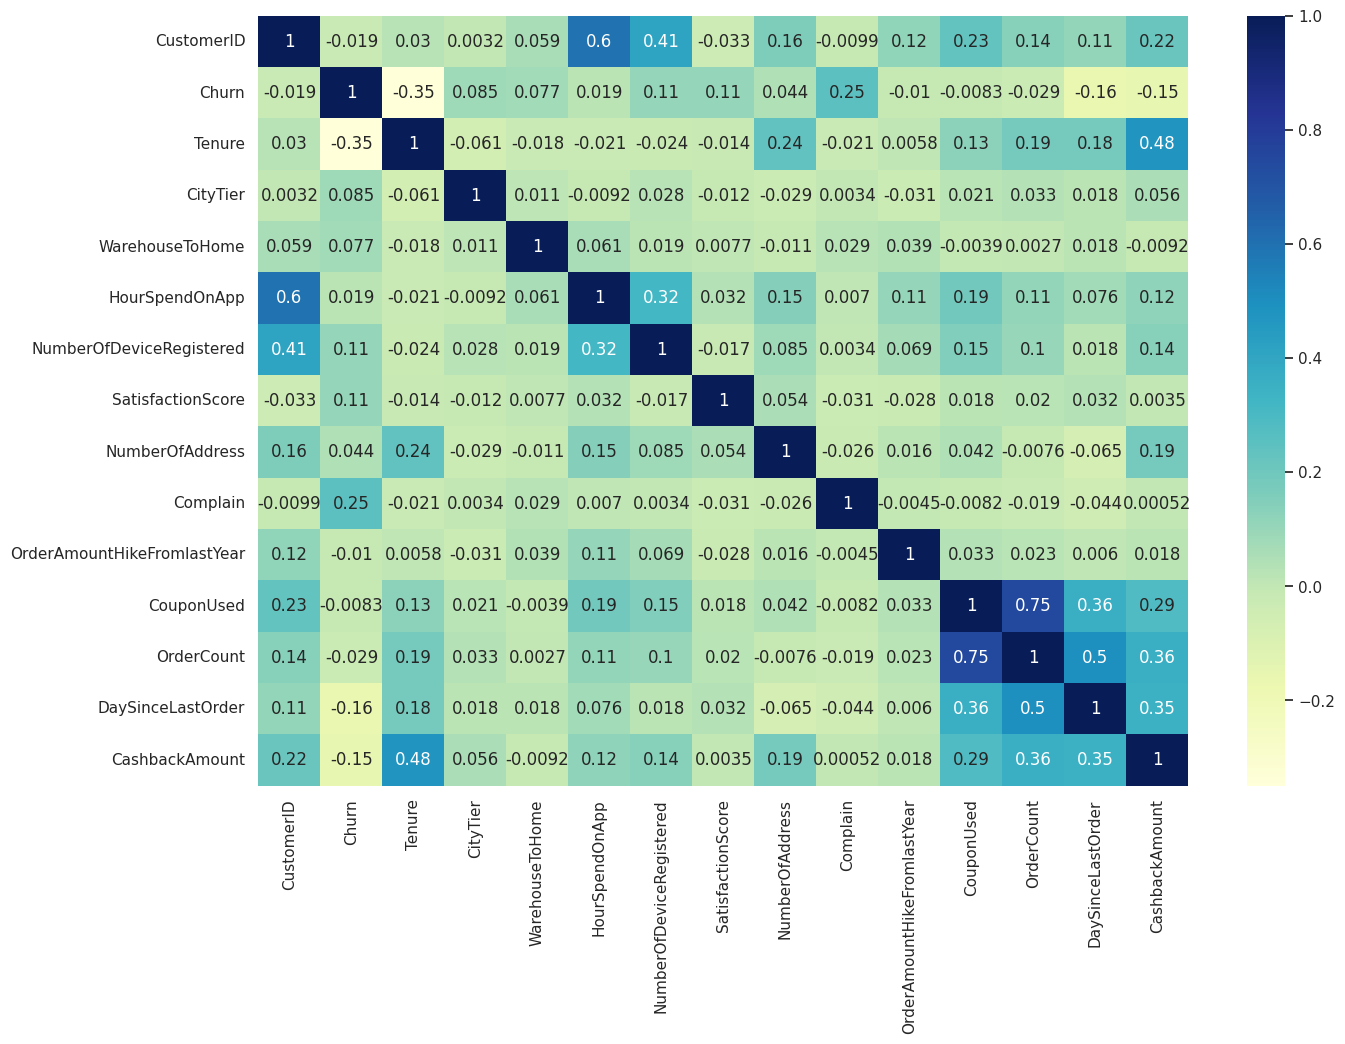

In [ ]:
sns.set(rc={'figure.figsize':(15,10)})
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)


In [ ]:
def count_percentage(df, column, target, count):
    '''
    This function to create the table calculate the percentage of fraud/non-fraud transaction on total transaction group by category values

    Input: df: dataframe
    column: the category column need to be groupby
    target: the target column
    count: the column to count the transactions

    Example:
    df = df_train, column = 'job', target = 'is_fraud', count = 'cc_num'

    '''

    # Create 2 dataframes of fraud and non-fraud
    churn = df[df[target]==1].groupby(column)[[count]].count().reset_index().sort_values(ascending=False, by = count)
    not_churn = df[df[target]==0].groupby(column)[[count]].count().reset_index().sort_values(ascending=False, by = count)

    #Merge 2 dataframe into one:
    cate_df = churn.merge(not_churn, on = column , how = 'outer')
    cate_df = cate_df.fillna(0)
    cate_df.rename(columns = {count+'_x':'churn',count+'_y':'not_churn'}, inplace = True)

    #Caculate the percentage:
    cate_df['%'] = cate_df['churn']/(cate_df['churn']+cate_df['not_churn'])

    return cate_df

TENURE, DAYSINCERLASTORDER,COMPLAIN, CASHBACK


<Axes: xlabel='Tenure', ylabel='%'>

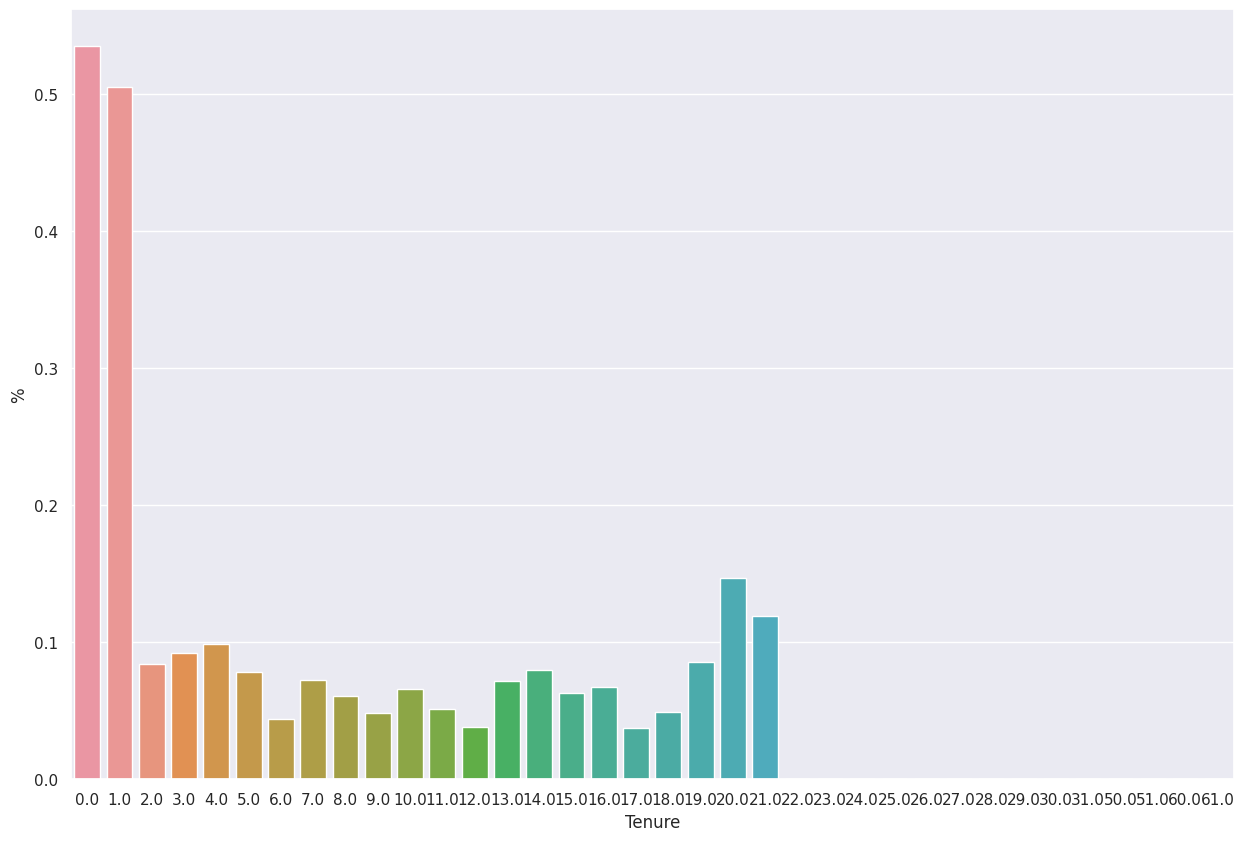

In [ ]:
tenure_df = count_percentage(data, 'Tenure', 'Churn', 'CustomerID')
sns.barplot(data=tenure_df, x='Tenure', y='%')

<Axes: xlabel='DaySinceLastOrder', ylabel='%'>

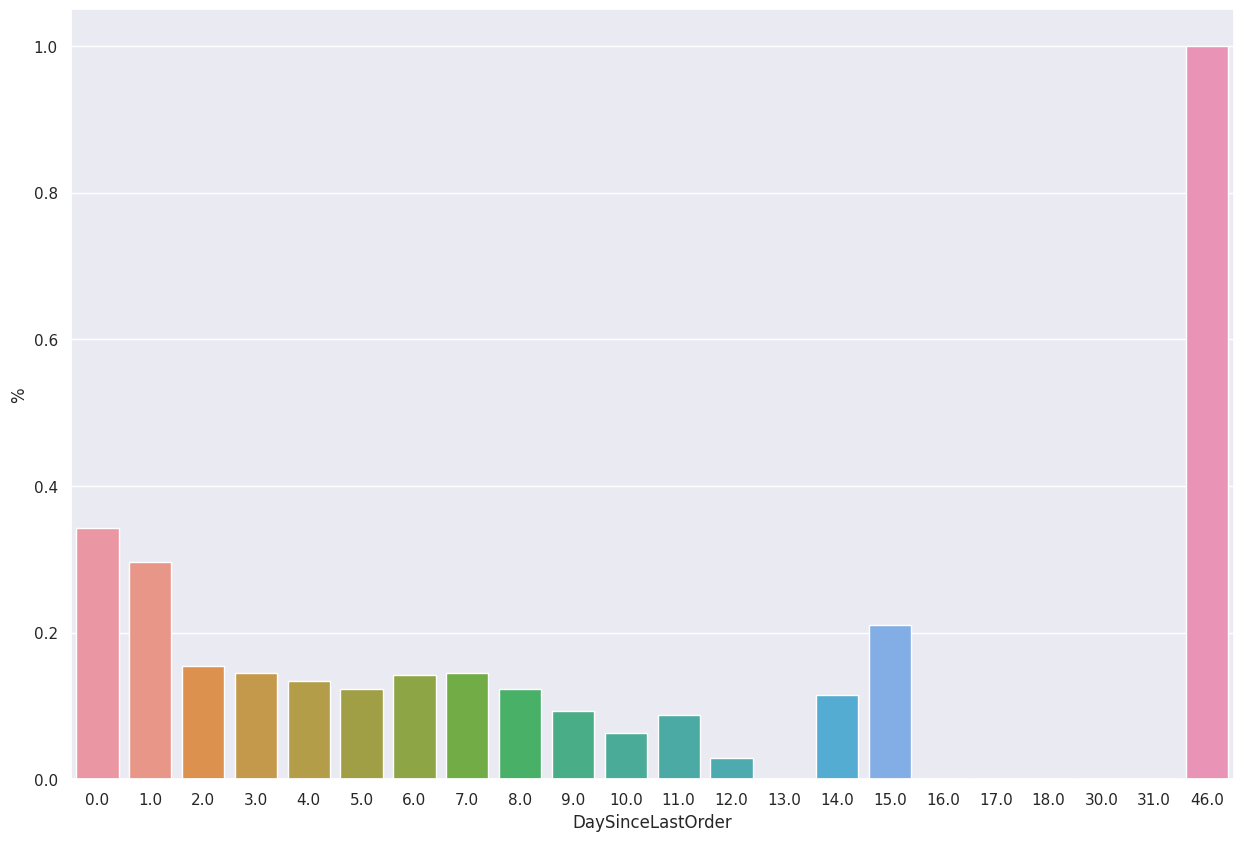

In [ ]:
time_df = count_percentage(data, 'DaySinceLastOrder', 'Churn', 'CustomerID')
sns.barplot(data=time_df, x='DaySinceLastOrder', y='%')

<Axes: xlabel='Complain', ylabel='%'>

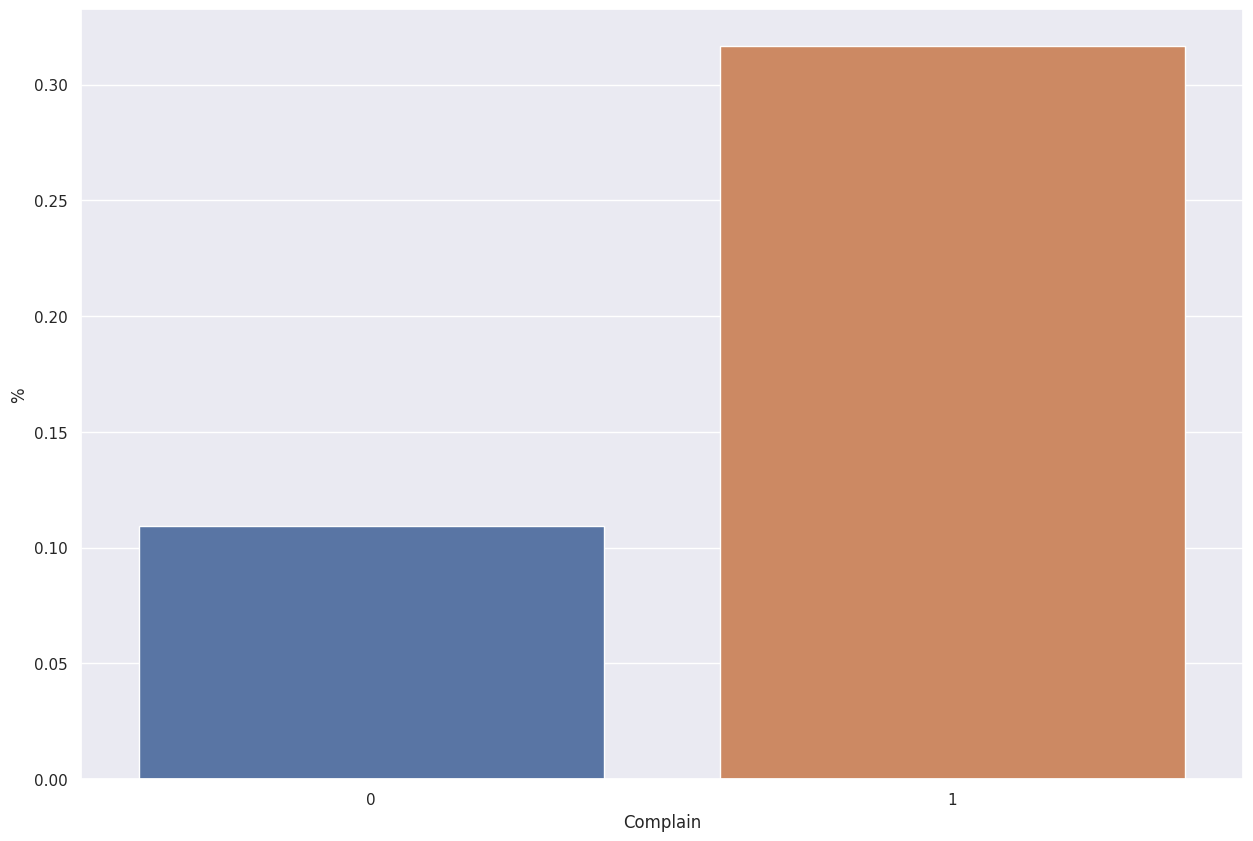

In [ ]:
complain_df = count_percentage(data,'Complain', 'Churn', 'CustomerID')
sns.barplot(data=complain_df, x='Complain', y='%')

<Axes: xlabel='CashbackAmount', ylabel='%'>

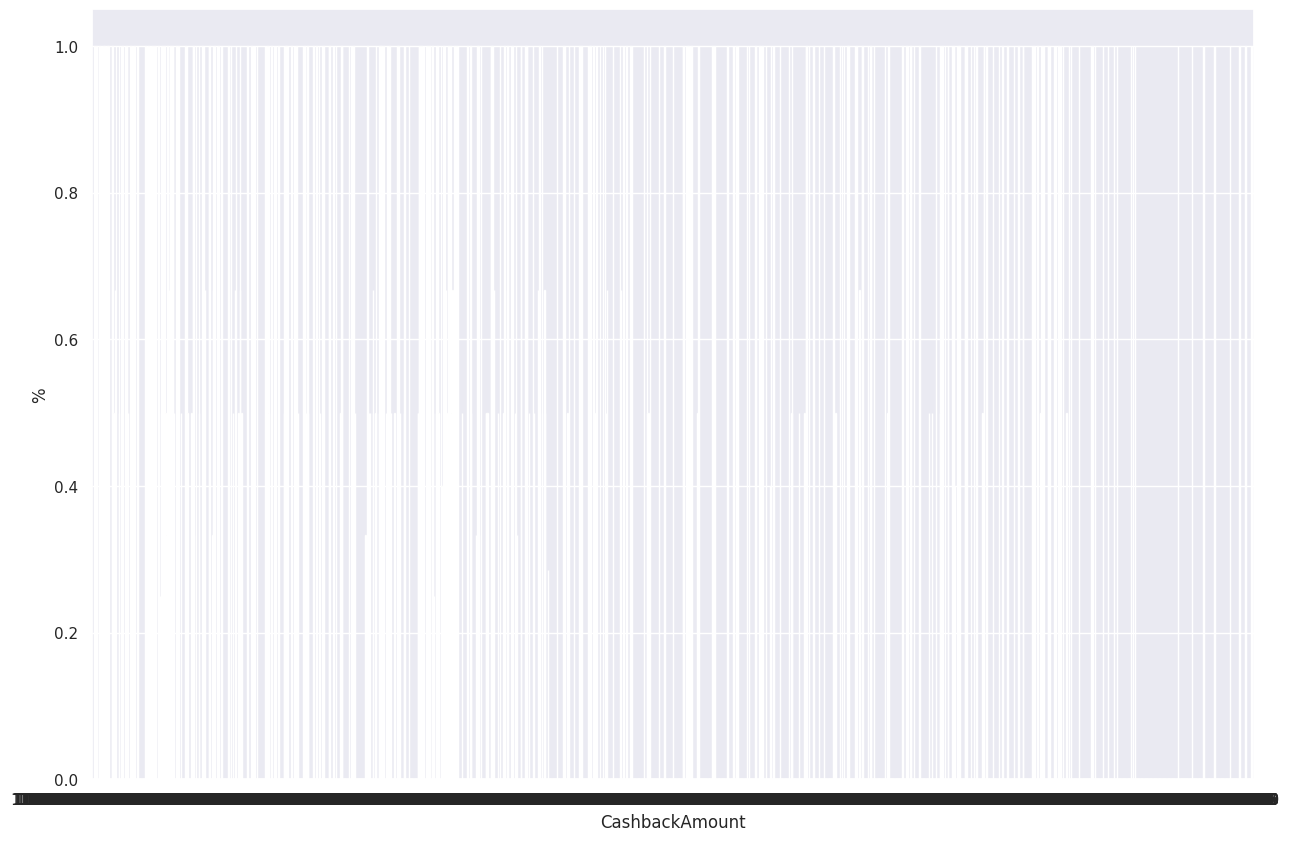

In [ ]:
cashback_df = count_percentage(data, 'CashbackAmount', 'Churn', 'CustomerID')
sns.barplot(data=cashback_df, x='CashbackAmount', y='%')

<Axes: xlabel='NumberOfDeviceRegistered', ylabel='%'>

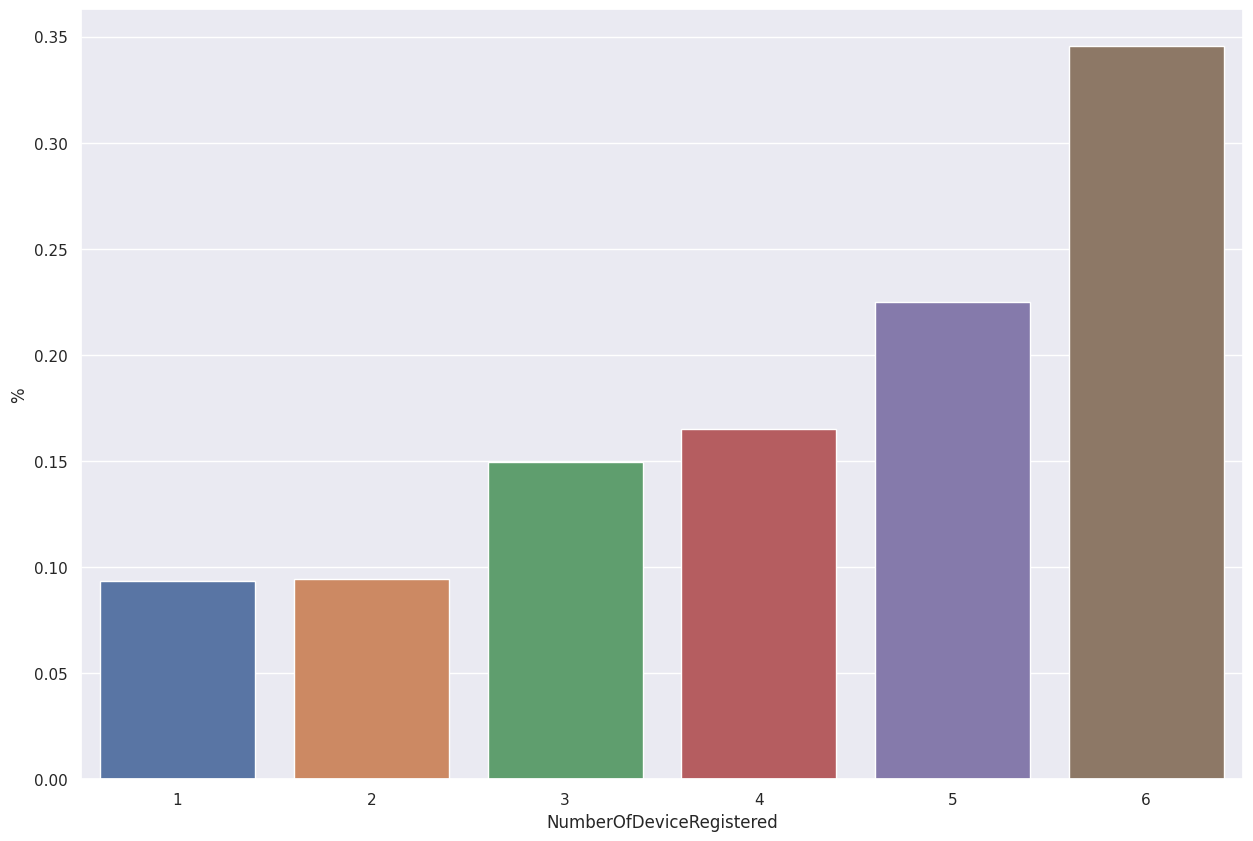

In [ ]:
device_df = count_percentage(data, 'NumberOfDeviceRegistered', 'Churn', 'CustomerID')
sns.barplot(data=device_df, x='NumberOfDeviceRegistered', y='%')

 PREFERREDORDERCAT & MARITALSTATUS

<Axes: xlabel='PreferedOrderCat', ylabel='%'>

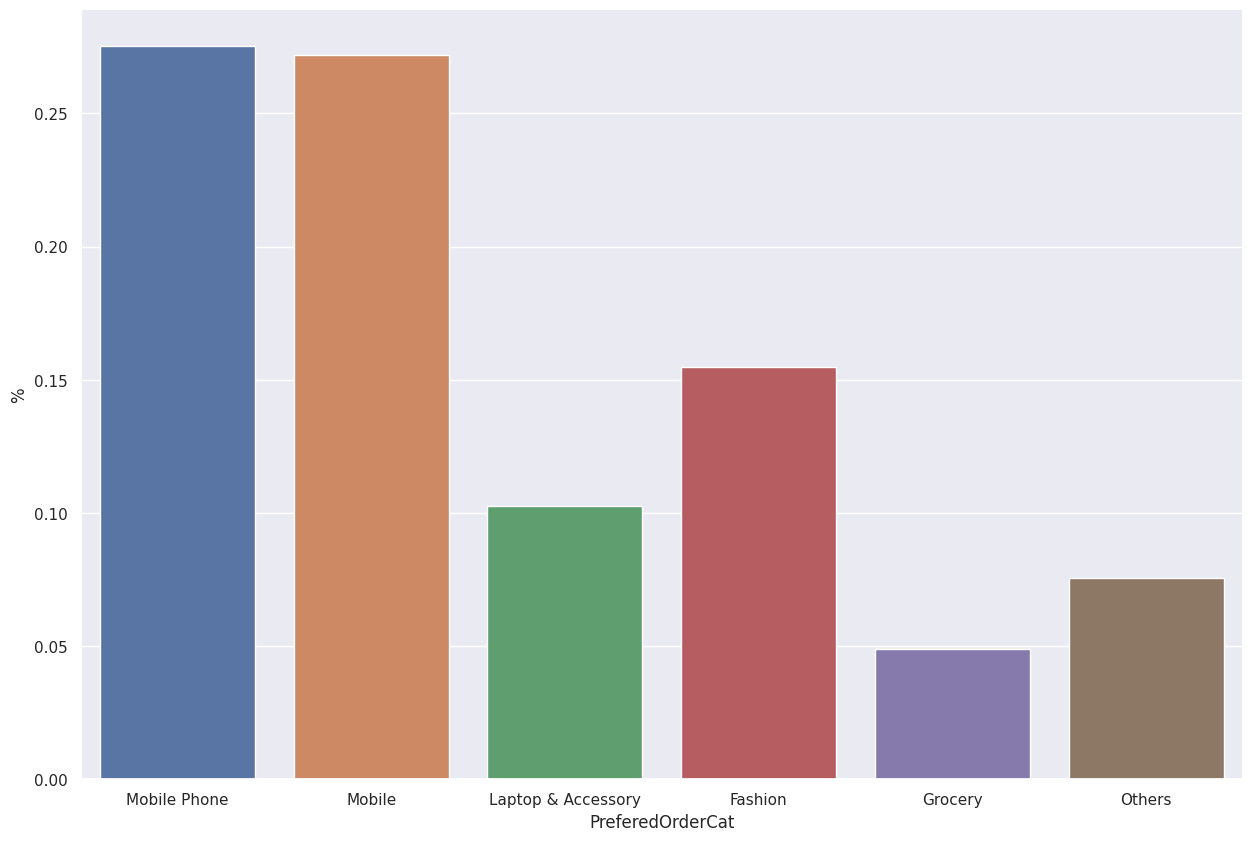

In [ ]:
cate_df = count_percentage(data, 'PreferedOrderCat', 'Churn', 'CustomerID')
sns.barplot(data=cate_df, x='PreferedOrderCat', y='%')

<Axes: xlabel='MaritalStatus', ylabel='%'>

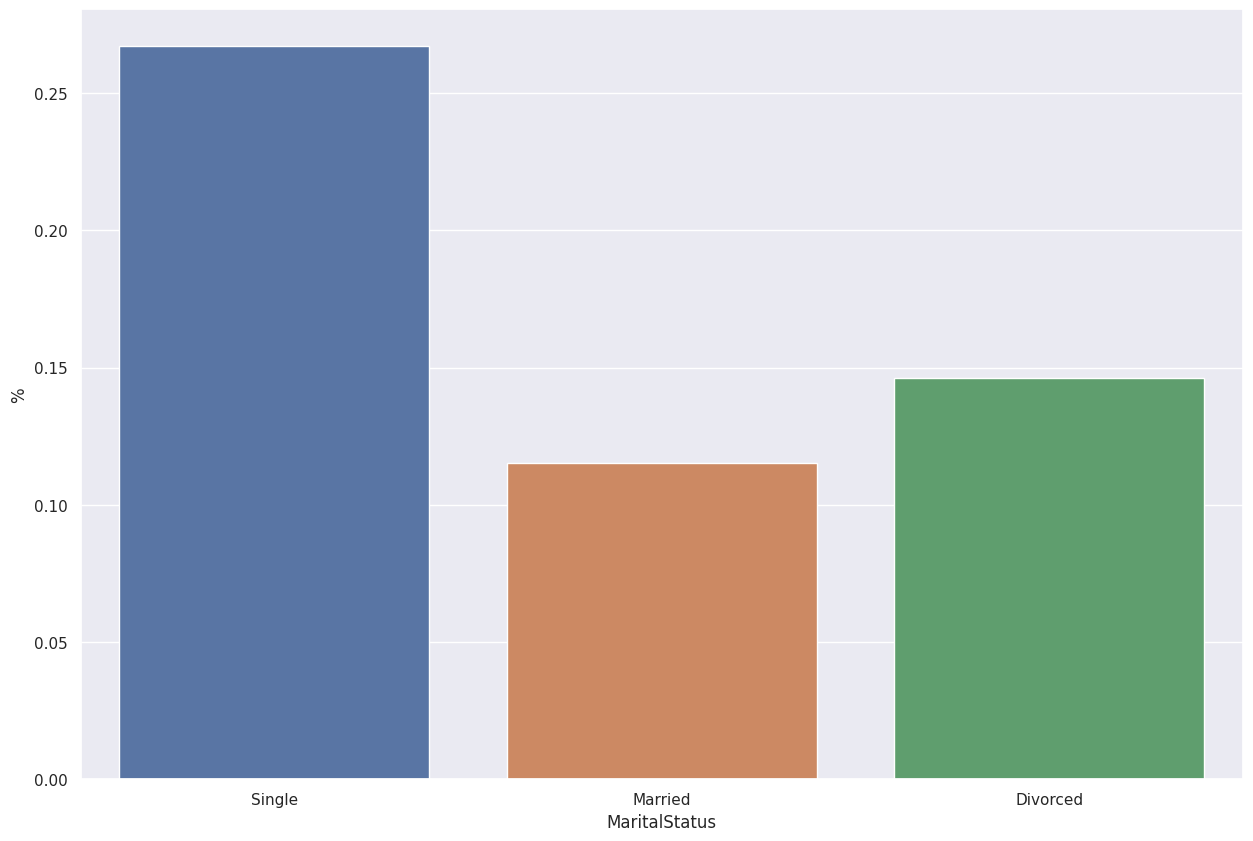

In [ ]:
marital_df = count_percentage(data, 'MaritalStatus', 'Churn', 'CustomerID')
sns.barplot(data=marital_df, x='MaritalStatus', y='%')

<Axes: xlabel='Gender', ylabel='%'>

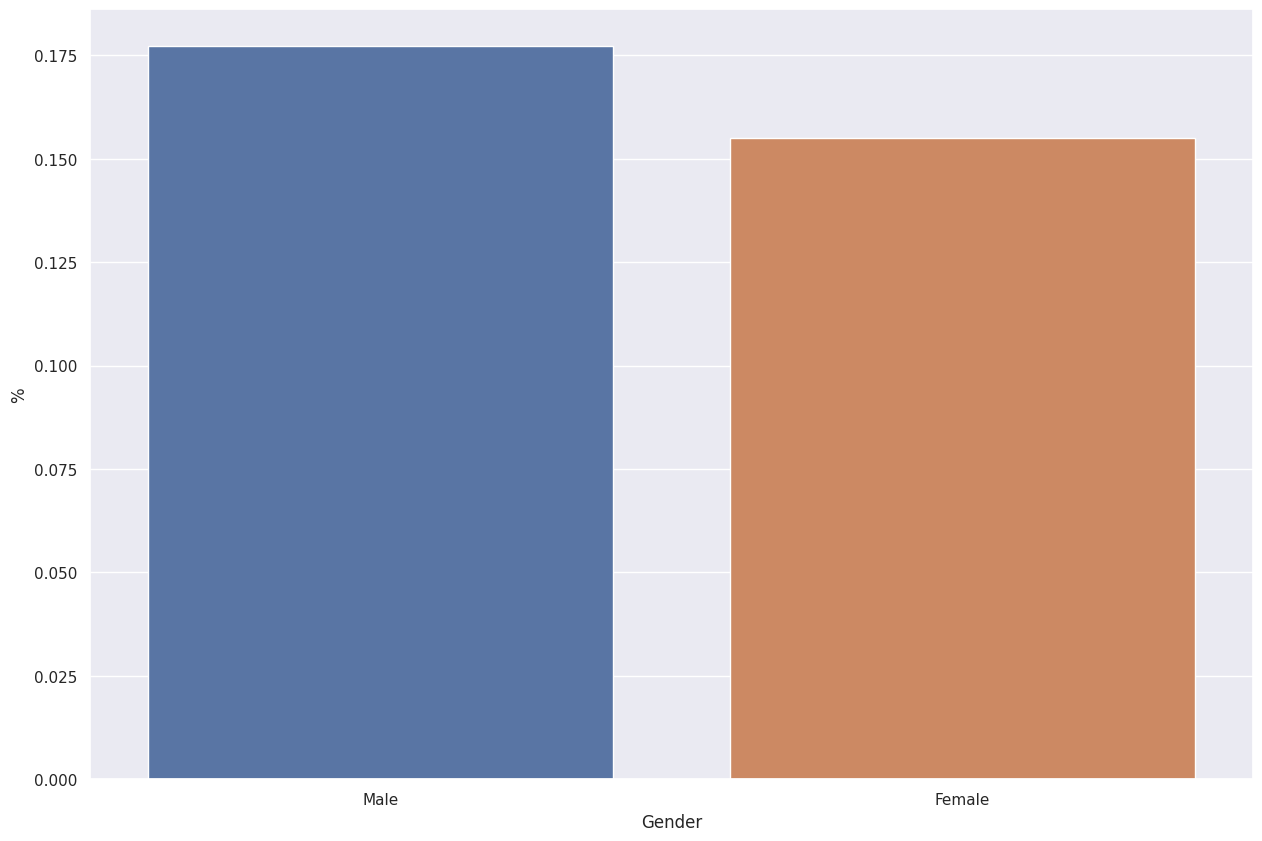

In [ ]:
gender_df = count_percentage(data, 'Gender', 'Churn', 'CustomerID')
sns.barplot(data=gender_df, x='Gender', y='%')

As the table shows, the percentage of fraud and non-fraud between male & female is not significantly different
=> We can conclude that gender have no relationship with target column

1.After EDA we will keep the below columns to the model:
* Tenure
* Complain
* DaySinceLastOrder
* NumberOfDeviceRegistered
* CashbackAmount
* PreferedOrderCat
* MaritalStatus

### **Encoding & Normalizing:**

In [ ]:
df_model= data[['Tenure','Complain','DaySinceLastOrder','CashbackAmount','NumberOfDeviceRegistered','PreferedOrderCat','MaritalStatus','Churn']]
df_model

,Tenure,Complain,DaySinceLastOrder,CashbackAmount,NumberOfDeviceRegistered,PreferedOrderCat,MaritalStatus,Churn
0,4.0,1,5.0,159.93,3,Laptop & Accessory,Single,1
1,NaN,1,0.0,120.90,4,Mobile,Single,1
2,NaN,1,3.0,120.28,4,Mobile,Single,1
3,0.0,0,3.0,134.07,4,Laptop & Accessory,Single,1
4,0.0,0,3.0,129.60,3,Mobile,Single,1
...,...,...,...,...,...,...,...,...
5625,10.0,0,4.0,150.71,2,Laptop & Accessory,Married,0
5626,13.0,0,NaN,224.91,5,Fashion,Married,0
5627,1.0,1,4.0,186.42,2,Laptop & Accessory,Married,0
5628,23.0,0,9.0,178.90,5,Laptop & Accessory,Married,0


In [ ]:
list_columns = ['PreferedOrderCat','MaritalStatus']
df_model = pd.get_dummies(df_model, columns = list_columns)
df_model

,Tenure,Complain,DaySinceLastOrder,CashbackAmount,NumberOfDeviceRegistered,Churn,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,4.0,1,5.0,159.93,3,1,0,0,1,0,0,0,0,0,1
1,NaN,1,0.0,120.90,4,1,0,0,0,1,0,0,0,0,1
2,NaN,1,3.0,120.28,4,1,0,0,0,1,0,0,0,0,1
3,0.0,0,3.0,134.07,4,1,0,0,1,0,0,0,0,0,1
4,0.0,0,3.0,129.60,3,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,10.0,0,4.0,150.71,2,0,0,0,1,0,0,0,0,1,0
5626,13.0,0,NaN,224.91,5,0,1,0,0,0,0,0,0,1,0
5627,1.0,1,4.0,186.42,2,0,0,0,1,0,0,0,0,1,0
5628,23.0,0,9.0,178.90,5,0,0,0,1,0,0,0,0,1,0


In [ ]:
list_columns = df_model.columns.tolist()
list_columns


['Tenure',
 'Complain',
 'DaySinceLastOrder',
 'CashbackAmount',
 'NumberOfDeviceRegistered',
 'Churn',
 'PreferedOrderCat_Fashion',
 'PreferedOrderCat_Grocery',
 'PreferedOrderCat_Laptop & Accessory',
 'PreferedOrderCat_Mobile',
 'PreferedOrderCat_Mobile Phone',
 'PreferedOrderCat_Others',
 'MaritalStatus_Divorced',
 'MaritalStatus_Married',
 'MaritalStatus_Single']

In [ ]:
list_columns = df_model.columns.tolist()
list_columns
from sklearn.preprocessing import MinMaxScaler

filter_df = df_model[list_columns]
scaler = MinMaxScaler()
model=scaler.fit(filter_df)
scaled_data=model.transform(filter_df)

df_model = pd.DataFrame(scaled_data, columns = list_columns)
df_model=df_model.fillna(0)
df_model

,Tenure,Complain,DaySinceLastOrder,CashbackAmount,NumberOfDeviceRegistered,Churn,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,0.065574,1.0,0.108696,0.492107,0.4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.000000,1.0,0.000000,0.372011,0.6,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.000000,1.0,0.065217,0.370104,0.6,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.000000,0.0,0.065217,0.412536,0.6,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.000000,0.0,0.065217,0.398782,0.4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,0.163934,0.0,0.086957,0.463737,0.2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5626,0.213115,0.0,0.000000,0.692052,0.8,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5627,0.016393,1.0,0.086957,0.573618,0.2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5628,0.377049,0.0,0.195652,0.550478,0.8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


### **Apply model**

In [ ]:
from sklearn.model_selection import train_test_split
x=df_model.drop('Churn', axis = 1)
y=df_model[['Churn']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

#### **1.Logistic Regression:**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
clf_logis = LogisticRegression(random_state = 0)
clf_logis.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
y_pred_test = clf_logis.predict(x_test)
y_pred_train = clf_logis.predict(x_train)

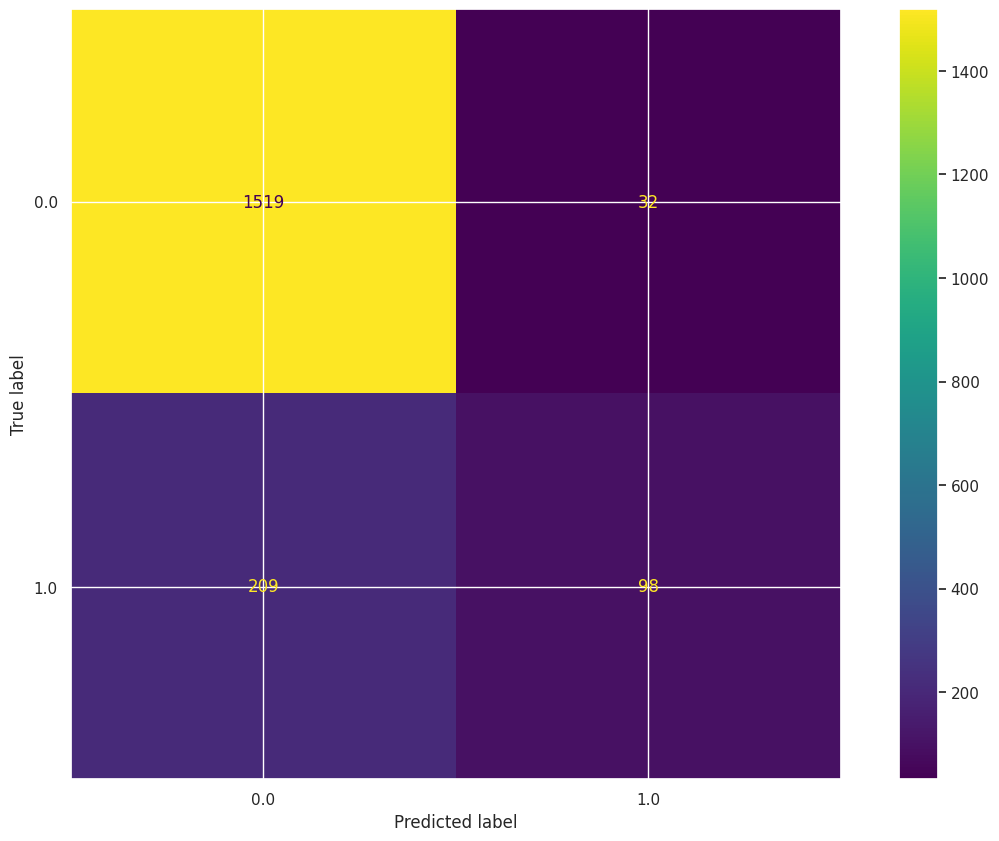

In [ ]:
cm = confusion_matrix(y_test, y_pred_test, labels=clf_logis.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_logis.classes_)
disp.plot()

In [ ]:
balanced_accuracy_train = balanced_accuracy_score(y_train, y_pred_train)
balanced_accuracy_test = balanced_accuracy_score(y_test, y_pred_test)
print(balanced_accuracy_train,balanced_accuracy_test)

0.6713303281412636 0.6492931953116304


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'penalty': ['l1', 'l2'],
              'solver': ['liblinear', 'saga']
}

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(clf_logis, param_grid, cv=5, scoring='balanced_accuracy')

# Fit the model
grid_search.fit(x_train, y_train)
/
# Print the best parameters
print("Best Parameters: ", grid_search.best_params_)

# Evaluate the best model on the test set
best_clf = grid_search.best_estimator_
accuracy = best_clf.score(x_test, y_test)
print("Test set accuracy: ", accuracy)

Best Parameters:  {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Test set accuracy:  0.8778256189451022


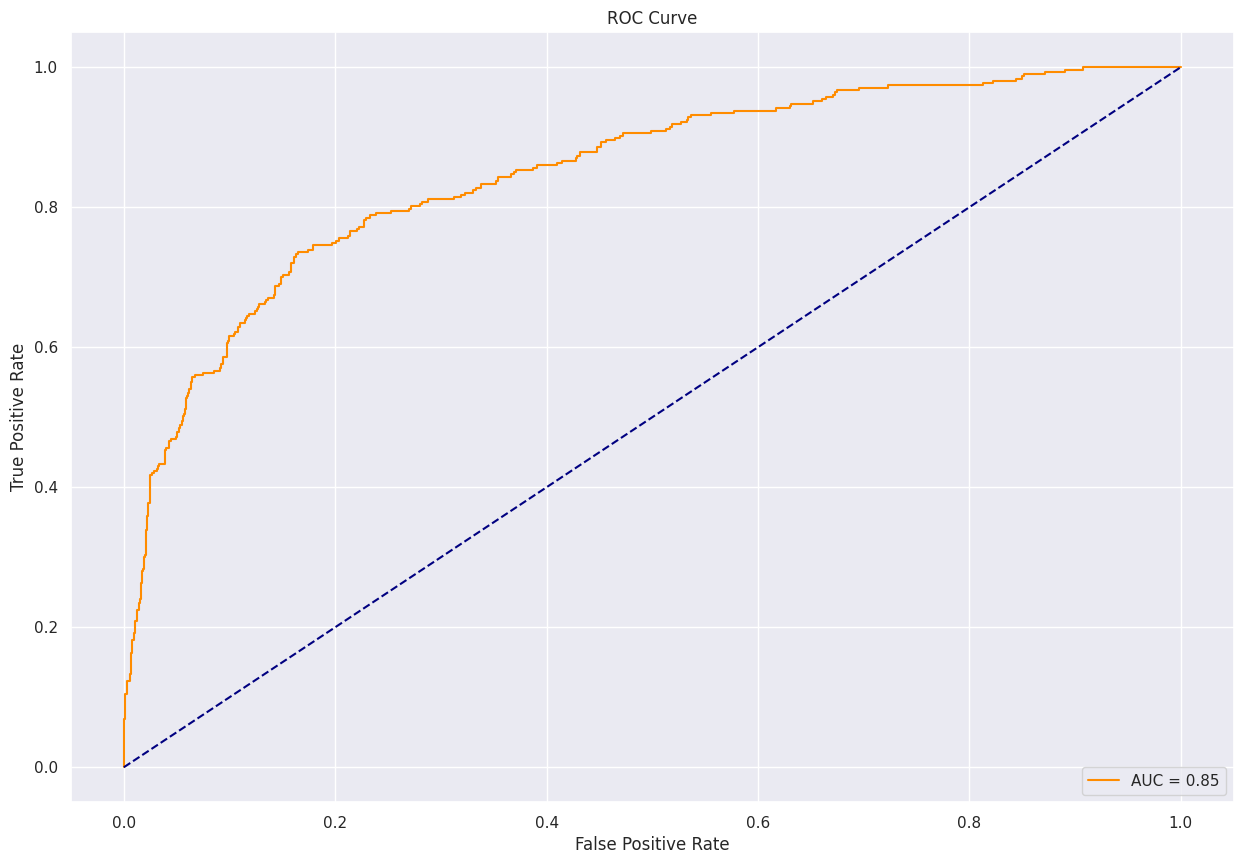

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

y_rand_tun_proba = clf_logis.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_rand_tun_proba)

roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Calculate the distance for each threshold
distances = np.sqrt((0 - fpr)**2 + (1 - tpr)**2)
# Get the threshold for the smallest distance
best_threshold = thresholds[np.argmin(distances)]
print(f"Best threshold: {best_threshold}")

Best threshold: 0.207526850561877


In [ ]:
threshold = 0.207

y_rand_tun_proba = clf_rand.predict_proba(x_test)[:,1]  #clf_rand_tun is the model have hyperparameter after tunning

y_pred_prod = (y_rand_tun_proba > threshold).astype(int)


balanced_accuracy = balanced_accuracy_score(y_test, y_pred_prod)
print("Test balanced accurary :", round(balanced_accuracy,5))

Test balanced accurary : 0.79369


#### **2.Decision Tree:**

In [ ]:
from sklearn import tree

# Fit model into train set:
clf_des = tree.DecisionTreeClassifier()
clf_des.fit(x_train,y_train)

# Apply model on train set and test set:
y_tree_pre_train = clf_des.predict(x_train)
y_tree_pre_test = clf_des.predict(x_test)

# Calculate the balanced accuracy on train set and test set to check overfiting and underfiting:
print(f'Balance accuracy of train set: {balanced_accuracy_score(y_train, y_tree_pre_train)}')
print(f'Balance accuracy of test set: {balanced_accuracy_score(y_test, y_tree_pre_test)}')

Balance accuracy of train set: 1.0
Balance accuracy of test set: 0.8718762929033912


#### **2.Random Forest:**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Fit model into train set:
clf_rand = RandomForestClassifier(max_depth=2, random_state=0)
clf_rand.fit(x_train, y_train)

# Apply model on train set and test set:
y_ranf_pre_train = clf_rand.predict(x_train)
y_ranf_pre_test = clf_rand.predict(x_test)

# Calculate the balanced accuracy on train set and test set to check overfiting and underfiting:
print(f'Balance accuracy of train set: {balanced_accuracy_score(y_train, y_ranf_pre_train)}')
print(f'Balance accuracy of test set: {balanced_accuracy_score(y_test, y_ranf_pre_test)}')

Balance accuracy of train set: 0.5
Balance accuracy of test set: 0.5


In [ ]:
feats = {} # a dict to hold feature_name: feature_importance

for feature, importance in zip(x_test.columns, clf_rand.feature_importances_):
    feats[feature] = importance #add the name/value pair

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances = importances.sort_values(by='Gini-importance', ascending=True)

importances = importances.reset_index()

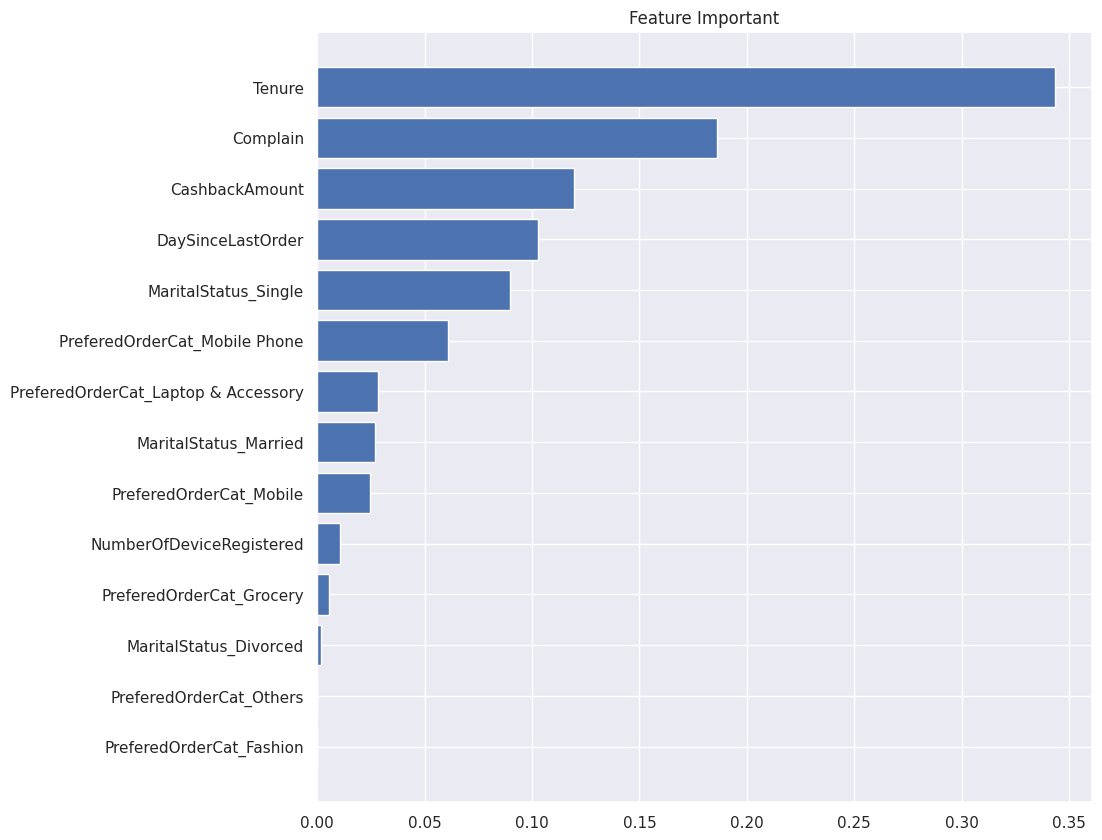

In [ ]:
# Create bar chart
plt.figure(figsize=(10, 10))
plt.barh(importances.tail(20)['index'][:20], importances.tail(20)['Gini-importance'])

plt.title('Feature Important')

# Show plot
plt.show()

####  Hyperparameter Tuning:

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(clf_rand, param_grid, cv=5, scoring='balanced_accuracy')

# Fit the model
grid_search.fit(x_train, y_train)
/
# Print the best parameters
print("Best Parameters: ", grid_search.best_params_)

# Evaluate the best model on the test set
best_clf = grid_search.best_estimator_
accuracy = best_clf.score(x_test, y_test)
print("Test set accuracy: ", accuracy)

Best Parameters:  {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Test set accuracy:  0.9203444564047363


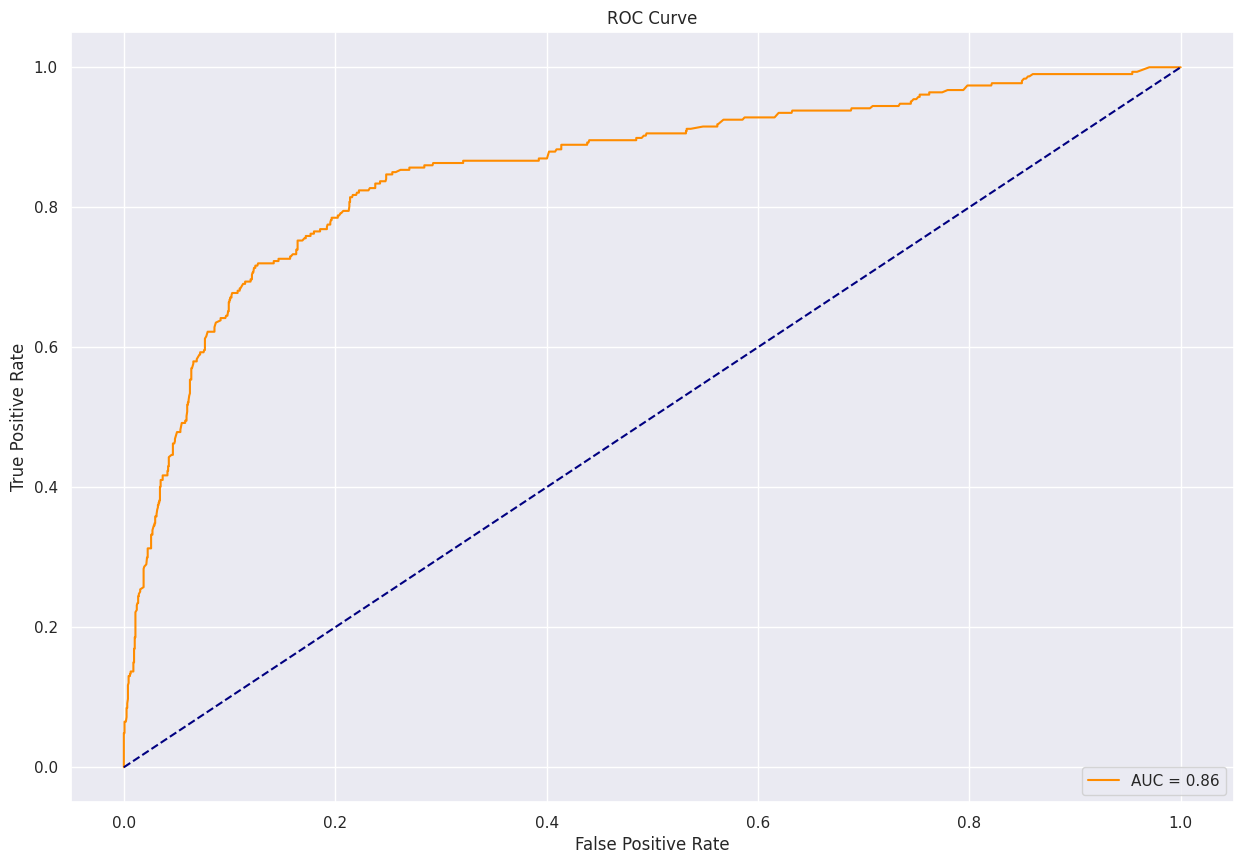

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

y_rand_tun_proba = clf_rand.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_rand_tun_proba)

roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Calculate the distance for each threshold
distances = np.sqrt((0 - fpr)**2 + (1 - tpr)**2)
# Get the threshold for the smallest distance
best_threshold = thresholds[np.argmin(distances)]
print(f"Best threshold: {best_threshold}")

Best threshold: 0.18191704013909338


In [ ]:
threshold = 0.18

y_rand_tun_proba = clf_rand.predict_proba(x_test)[:,1]  #clf_rand_tun is the model have hyperparameter after tunning

y_pred_prod = (y_rand_tun_proba > threshold).astype(int)


balanced_accuracy = balanced_accuracy_score(y_test, y_pred_prod)
print("Test balanced accurary :", round(balanced_accuracy,5))

Test balanced accurary : 0.7992


CONCLUSION:
Churn customers have these patterns: short tenure ( less than 2 months), large time spending on app (more than 4 h), register on many devices ( more than 5),marital statut signgle, people with high complain have the most probability to churn.

Models to choose:

*Random Forest is the model which suits the most for this dataset.


Suggestions:Analyze why churn occurs (use active channels mal, chat, scoial media...) to have feedback from churn customer. Identify customer at risk and valuable customer to engage them better